In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('spam_emails.csv')


In [3]:
dataset.shape


(5572, 2)

In [4]:
## Encoding catagorical data


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [6]:
dataset['Category'] = label_encoder.fit_transform(dataset['Category'])

In [7]:
dataset.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# checking  Null values
dataset.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
# duplicate values
dataset.duplicated().sum()

415

In [10]:
dataset = dataset.drop_duplicates(keep='first')

In [11]:
dataset.duplicated().sum()

0

In [12]:
dataset.shape

(5157, 2)

## EDA (Exploratory Data Analysis)

In [14]:
dataset.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
X = dataset.iloc[:, 1].values

In [16]:
Y = dataset.iloc[:, 0].values

In [17]:
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [18]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [19]:
# Counting Ham or Spam in dataset
dataset['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

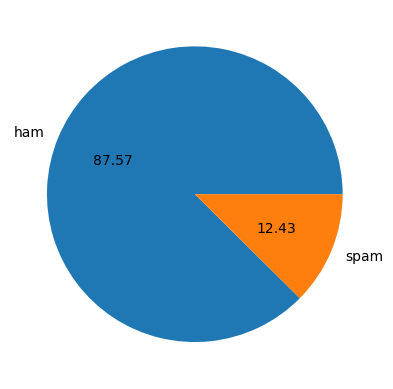

In [20]:
import matplotlib.pyplot as plt
plt.pie(dataset['Category'].value_counts(), labels = ['ham','spam'], autopct = "%0.2f")
plt.show()


In [21]:
# Breaking of words,sentences to analyze the data

In [22]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
#Breaking the message in characters
dataset['num_of_characters'] = dataset['Message'].apply(len)

In [26]:
dataset.head()

,Category,Message,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# Breaking the message into words by using nltk.word_tokenize()

dataset['Message'].apply(lambda x : nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5157, dtype: object

In [28]:
# creating a new column num_of_words by counting len of words
dataset['num_of_words'] = dataset['Message'].apply(lambda x : len(nltk.word_tokenize(x)))


In [29]:
dataset.head()

,Category,Message,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
# Simplarly for sentence breaking
dataset['num_of_sentence'] = dataset['Message'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [31]:
dataset.head()

,Category,Message,num_of_characters,num_of_words,num_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
# Now, we can describe the data for analyzing

In [33]:
dataset[['num_of_characters', 'num_of_words','num_of_sentence']].describe()

,num_of_characters,num_of_words,num_of_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# Analyzing ham messages
dataset[Y == 0][['num_of_characters', 'num_of_words','num_of_sentence']].describe()   # Category(Y)

,num_of_characters,num_of_words,num_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# Analyzing spam messages
dataset[Y == 1][['num_of_characters', 'num_of_words','num_of_sentence']].describe()   # Category(Y)

,num_of_characters,num_of_words,num_of_sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [36]:
# to check the relationship betweeen num_of_characters , num_of_words and num_of_sentence through heat map
import seaborn as sns


<Axes: xlabel='num_of_characters', ylabel='Count'>

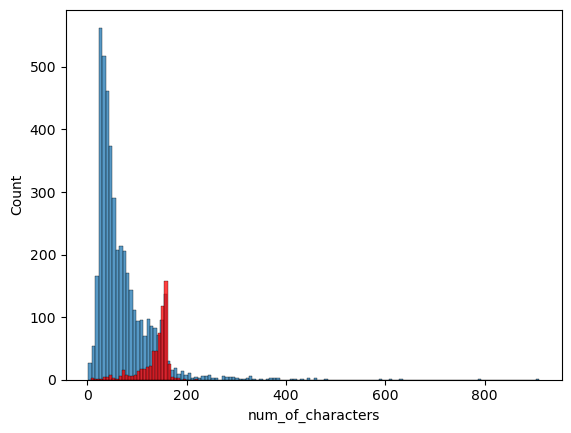

In [37]:
sns.histplot(dataset[Y==0]['num_of_characters'])
sns.histplot(dataset[Y==1]['num_of_characters'],color = 'red')

In [38]:
numeric_dataset = dataset.select_dtypes(include=['float64', 'int']) # it automatically excludes string dtatypes from the dataset
numeric_dataset.corr()

,Category,num_of_characters,num_of_words,num_of_sentence
Category,1.000000,0.374409,0.255968,0.259023
num_of_characters,0.374409,1.000000,0.966155,0.622428
num_of_words,0.255968,0.966155,1.000000,0.679396
num_of_sentence,0.259023,0.622428,0.679396,1.000000


<Axes: >

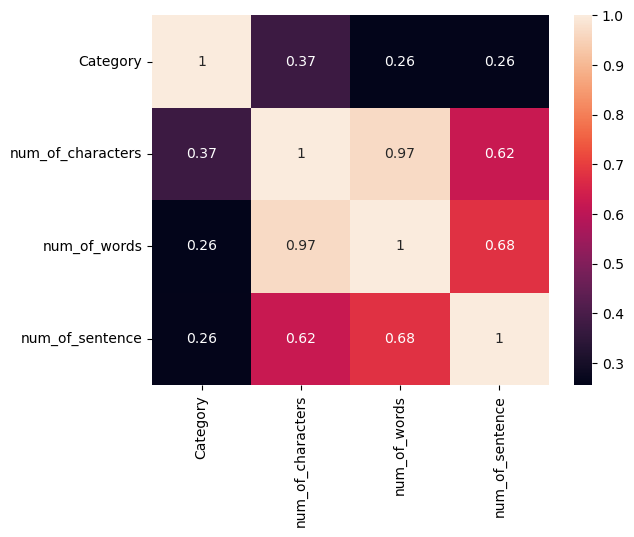

In [39]:
sns.heatmap(numeric_dataset.corr(),annot = True)

In [40]:
# here we understood that there is issues of multicollinearity in the data
# so we decide to use only num_of_characters as our independent varible while building the model


Data Preprocessing

1. Lower Case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [42]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer     # FOR STEMMING e.g. loving = love, dancing = danc 
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:


def transform_Message(Message):
    Message = Message.lower()                               # Lower case
    Message = nltk.word_tokenize(Message)               # Tokenization
    
    list_word = []
                                                            # Removing special character
    for i in Message:
        if i.isalnum():
            list_word.append(i)

    Message = list_word[:]                                   # As list cannot be directly assign , we need to cloning as its a mutable datatype
    list_word.clear()

    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:             # Removing stopwords and punctuation 
            list_word.append(i)
            
    Message = list_word[:]                                   # As list cannot be directly assign , we need to cloning as its a mutable datatype
    list_word.clear()

    for i in Message:
        list_word.append(ps.stem(i))
        
    
    return list_word

In [46]:
dataset['transformed_Message'] = dataset['Message'].apply(transform_Message)

In [47]:
dataset.head()

,Category,Message,num_of_characters,num_of_words,num_of_sentence,transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [48]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [49]:

from wordcloud import WordCloud
wc = WordCloud(width = 50, height = 500, min_font_size = 50, background_color = 'white')

In [50]:
dataset.dtypes

Category                int32
Message                object
num_of_characters       int64
num_of_words            int64
num_of_sentence         int64
transformed_Message    object
dtype: object

In [51]:
# Ensure all values in 'transformed_Message' are strings
dataset['transformed_Message'] = dataset['transformed_Message'].astype(str)

# Now generate the word for spam messages
spam_words =  dataset[Y == 1]['transformed_Message'].str.cat(sep=" ")

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

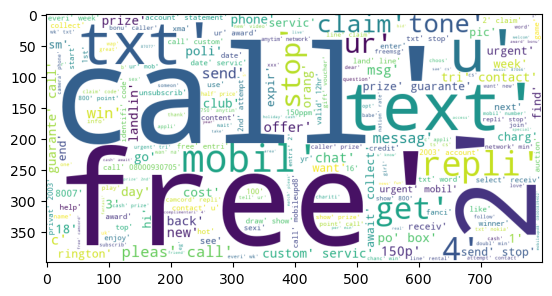

In [52]:
plt.imshow(wc)

In [53]:
# Now generate the word  for ham messages
spam_words =  dataset[Y == 0]['transformed_Message'].str.cat(sep=" ")

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

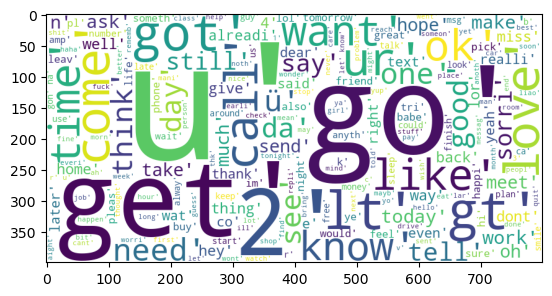

In [54]:
plt.imshow(wc)

# Now, I am going to show the top most words that are used in spam or ham mails

In [56]:
spam_corpus = []
for message in dataset[Y==1]['transformed_Message'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

9781

In [58]:
from collections import Counter
Counter(spam_corpus).most_common(5)

[("'call',", 296),
 ("'2',", 153),
 ("'free',", 153),
 ("'txt',", 135),
 ("'text',", 118)]

In [59]:
ham_corpus = []
for message in dataset[Y==0]['transformed_Message'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35948

In [61]:
from collections import Counter
Counter(ham_corpus).most_common(5)

[("'u',", 737), ("'go',", 357), ("'get',", 296), ("'2',", 276), ("'lt',", 271)]

# Model Building

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
tfidf = TfidfVectorizer(max_features= 3000)

In [65]:
x = tfidf.fit_transform(dataset['transformed_Message']).toarray()

In [66]:
x.shape

(5157, 3000)

In [67]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
Y                           # Category(ham or spam)

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(x,Y, test_size = 0.25, random_state = 0)


In [70]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
gnb.fit(x_train, Y_train )
y_pred1 = gnb.predict(x_test)

print(accuracy_score(Y_test, y_pred1))
print(confusion_matrix(Y_test, y_pred1))
print(precision_score(Y_test, y_pred1))

0.8643410852713178
[[977 147]
 [ 28 138]]
0.4842105263157895


In [73]:
mnb.fit(x_train, Y_train )
y_pred2 = mnb.predict(x_test)

print(accuracy_score(Y_test, y_pred2))
print(confusion_matrix(Y_test, y_pred2))
print(precision_score(Y_test, y_pred2))

0.9751937984496124
[[1124    0]
 [  32  134]]
1.0


In [154]:
bnb.fit(x_train, Y_train )
y_pred3 = bnb.predict(x_test)

print(accuracy_score(Y_test, y_pred3))
print(confusion_matrix(Y_test, y_pred3))
print(precision_score(Y_test, y_pred3))

0.9744186046511628
[[1117    7]
 [  26  140]]
0.9523809523809523


# we can see that mnb model is performing  better than both models bnb and gnb

In [159]:
import os
import pickle

# Create directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the files to the 'models' directory
pickle.dump(tfidf, open('models/tfidf_vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('models/spam_detector_model.pkl', 'wb'))